# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import warnings

import pydot

warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Data manipulation and for computations 
import pandas as pd
import numpy as np

#visualization purposes 
import matplotlib.pyplot as plt 
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To Split the data into testing set and training set 
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Metrics to evaluate the model
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer)

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("ExtraaLearn.csv")


## Data Overview

- Observations
- Sanity checks

In [2]:
#copying the extracted data set into a new variable called: data to be manipulated so that the original data set won't be affected.
data = df.copy()

In [3]:
# to check whether we have duplicate values and get the sum of duplicates
data.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
4607    False
4608    False
4609    False
4610    False
4611    False
Length: 4612, dtype: bool>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

#### Observation:
* There are 4621 records and a total of 15 columns 
* All columns have 4621- non-null values indicating that there are no missing values.

In [5]:
# Observing/ counting unique values at each column 
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

#### Observations: 
* We have a total of 4612 unique leads 
* The occupation status of the leads can be : student, professional or unemployed 
* Profile completion is classified into: low (completed 0-50%), medium (completed 50% - 75%) or high (completed 75% - 100%) :::: now this field could be handy in identifying the interested leads


In [6]:
#Dropping unnecessary columns and not relevant to my model
data = data.drop(['ID'], axis=1)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


#### Observations: 
* The average age of leads is about 46 years, with a wide range from 18 to 63 years, indicating that the user base spans young adults to seniors.
* Leads visit the website on average 3.57 times, which suggests moderate engagement.
* There is an average time spent on the website of 724 minutes, but with a large standard deviation, indicating significant variation in user engagement.
* On average, leads view around 3 pages per visit, with some viewing as many as 18 pages, pointing to diverse browsing behaviors.
* About 30% of leads are converted to paid customers, which is a crucial figure for evaluating the success of conversion strategies.

In [8]:
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [9]:
data.shape

(4612, 14)

Observation : the updated total number of columns is now 14 indicationg that the column 'ID' was dropped successfully 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**Answers**
Q1. Impact of Current Occupation on Lead Status:

Professionals make up the majority of leads and have a higher conversion rate compared to students and unemployed individuals, indicating that current occupation significantly influences lead conversion.

Q2. Impact of First Interaction Channel on Lead Status:

The website is the primary channel for first interaction, with a slightly higher lead interaction rate than the mobile app, suggesting that the initial channel of interaction can impact lead conversion.

Q3. Most Effective Mode of Interaction:

Email activity is the most common last interaction, with phone activity also showing a high conversion rate, suggesting that direct and personal modes of interaction may be the most effective.

Q4. Lead Conversion Rate by Channel:

Leads not exposed to print media type1, type2, and digital media have higher conversion rates, implying that these channels might be less effective in lead conversion compared to others, though specific conversion rates per channel are needed for a conclusive statement.

Q5. Influence of Profile Completion on Conversion:

Higher profile completion correlates with higher conversion rates, suggesting that more detailed information about a prospect can increase the likelihood of lead conversion.

Separating categorical and numerical variables 

In [10]:
# instead of specifying and manually input the numeric and cat vals which may lead to 'syntax errors', the commands include --> np.number will include only numeric values using numpy and create an array of those values, on the other hand we will reverse the process for categorical values to 'exclude' any continuous variables.
num_cols  = data.select_dtypes(include=[np.number])
cat_cols = data.select_dtypes(exclude=[np.number])

# num_cols
# cat_cols

In [11]:
num_cols.shape

(4612, 5)

In [12]:
cat_cols.shape

(4612, 9)

#### Observations:
1. The total number of numeric columns after performing the columns separation is $ 5 $
2. On the other hand the total number of categorical columns is $ 9 $

For verification purposes the total number of columns is 14 

In [13]:
for col in cat_cols:
    print(df[col].value_counts(1))
    print('-'*50)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, 

#### Observations:
* 56.72% of leads are Professionals, suggesting targeted professional development offerings could be impactful.
* 55.12% of leads discover ExtraaLearn via the Website, indicating the importance of a strong web presence.
* A combined 97.99% of leads have medium to high profile completion, highlighting the potential for high engagement.
* Email Activity accounts for 49.39% of last interactions, emphasizing the effectiveness of email communication.
* Only 10.78% saw newspaper ads, pointing to the need for evaluating the effectiveness of print media campaigns.
* Just 5.05% noticed magazine ads, suggesting a similar reassessment of print media strategy.
* A small 11.43% of leads encountered digital ads, indicating possible underutilization or ineffectiveness of digital channels.
* 15.29% learned of ExtraaLearn through educational channels, offering room for growth in this area.
* With only 2.02% coming from referrals, there's an opportunity to enhance referral programs.

Visualization 

Phase 1 : analyzing numeric variables 
Phase 2: analyzing categorical variables 

In [14]:
# Plot style options
print(plt.style.available)
plt.style.use('seaborn-v0_8-pastel')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [15]:
def histogram_boxplot(df1, feature, figsize=(7, 4), kde=True, bins=None):
    figure, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=figsize)

    # Use sns.boxplot for the box plot
    sns.boxplot(data=df1, x=feature, ax=ax_box, showmeans=True)

    # Use sns.histplot for the histogram
    if bins is None:
        sns.histplot(data=df1, x=feature, ax=ax_hist, kde=kde, element='step', fill=False)
    else:
        sns.histplot(data=df1, x=feature, ax=ax_hist, kde=kde, bins=bins, element='step', fill=False)

    # Add vertical lines for mean and median
    ax_hist.axvline(df1[feature].mean(), linestyle='--', color='r')
    ax_hist.axvline(df1[feature].median(), linestyle='--', color='y')
    
     # Manually set grid color
    ax_hist.xaxis.grid(True, color='green', linestyle='--', linewidth=0.5)
    ax_hist.yaxis.grid(True, color='green', linestyle='--', linewidth=0.5)
    
    print('Skew :',round(data[feature].skew(), 2))


    # Show legend
    ax_hist.legend()

    # Display the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skew : -0.72


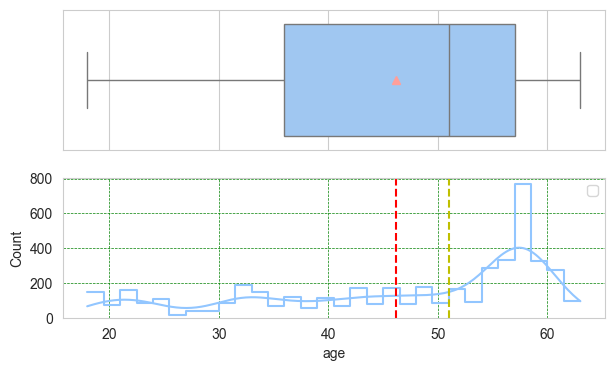

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skew : 2.16


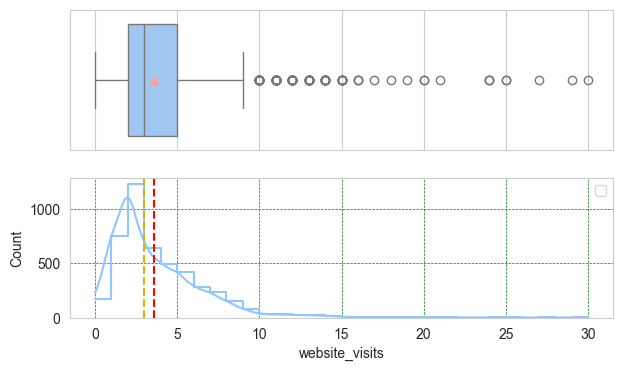

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skew : 0.95


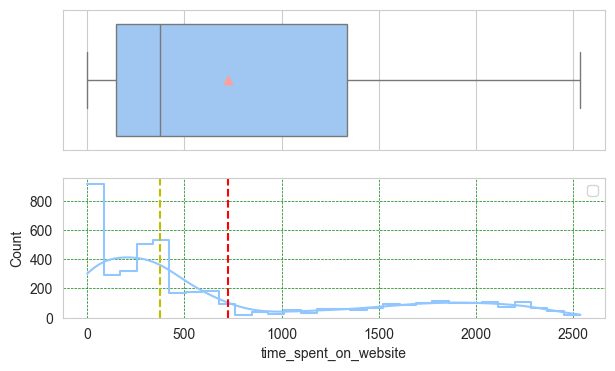

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skew : 1.27


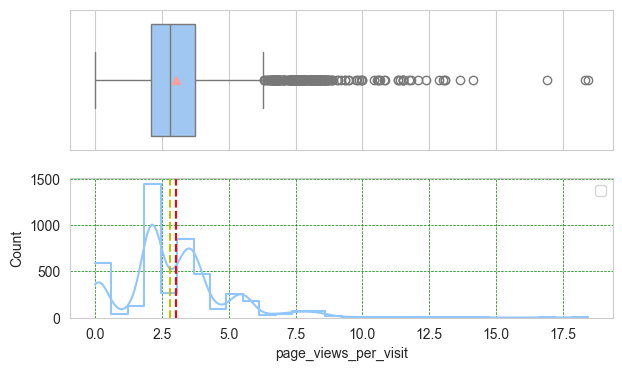

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skew : 0.88


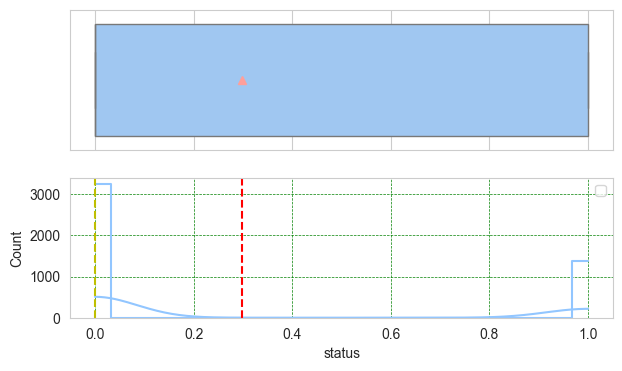

In [16]:
# a for loop to iterate through all the columns in the numeric array 
for i in num_cols:
    histogram_boxplot(data, i , bins=30)

caObservations: 
1. Age: 
* Skew: The age distribution has a negative skew (-0.72), indicating that the tail is on the left side of the distribution, so there are relatively more visitors in the higher age range. 
* Outliers: The boxplot suggests few outliers on the lower age side.
* Central Tendency: The median age is around the mid-30s, as indicated by the boxplot within the histogram.
Implication: This median age range could be the target demographic for the platform, indicating where marketing efforts and course development might be focused.
2. website  visits:
* Skew: This distribution is positively skewed (2.16), indicating that the tail extends to the right, showing that there are visitors with very high numbers of website visits but they are rare.
* Outliers: Numerous outliers are present above the upper whisker of the boxplot.
* Central Tendency: Most visitors have fewer than 5 visits.
* Implication: A small number of visitors have very high visit counts, which could be an indicator of strong engagement.
3. time spent on the website:
* Skew: The distribution has a positive skew (0.95), showing a long tail to the right.
* Outliers: There are outliers, indicating some visitors spend an unusually high amount of time on the website.
* Central Tendency: Most visitors spend 500 units or fewer (assuming the unit is seconds or minutes).
* Implication: Most visitors spend a moderate amount of time, but a few spend a lot of time which might indicate high engagement or potential conversion.
4. page view per visit:
* Skew: The distribution is positively skewed (1.27), with a tail stretching to the right.
* Outliers: The boxplot shows a significant number of outliers, suggesting some visits include unusually high page views.
* Central Tendency: The median is close to 2.5, suggesting that on average, a visitor views 2.5 pages per visit.
* Implication: There might be a few highly interested visitors or bots that skew the distribution.
5. status: (this is the feature)
* Skew: There is moderate positive skew (0.88), which is less pronounced than the other features.
* Outliers: It's unclear if there are outliers since "status" could be a binary feature (e.g., 0 for not converted, 1 for converted).
* Central Tendency: The histogram suggests a high number of 0s compared to 1s, which could mean that not many visitors are converted to paid status.
* Implication: Conversion rate is low, and strategies to improve conversion should be investigated.

In [17]:
# investigating numeric correlation 
numeric_corr = data.corr(numeric_only=True)
numeric_corr

,age,website_visits,time_spent_on_website,page_views_per_visit,status
age,1.000000,-0.011975,0.018885,-0.040675,0.122084
website_visits,-0.011975,1.000000,0.062300,0.074094,-0.006609
time_spent_on_website,0.018885,0.062300,1.000000,0.068130,0.302100
page_views_per_visit,-0.040675,0.074094,0.068130,1.000000,0.000307
status,0.122084,-0.006609,0.302100,0.000307,1.000000


<Axes: >

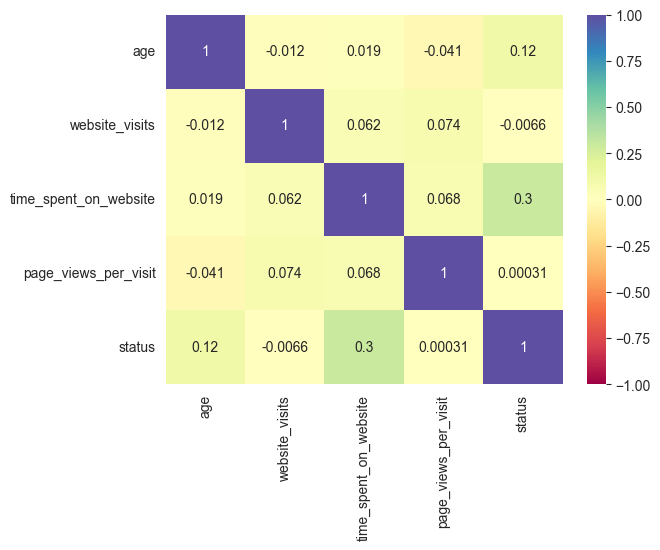

In [18]:
#Heatmap to visualize the collinearity 
sns.heatmap(numeric_corr, annot=True, cmap='Spectral', vmin=-1, vmax=1)

#### Observations:
* The values in the heatmap range from -1 to 1, where:
=========================================================================================================+
    1 implies a strong positive correlation: as one variable increases, the other one also increases.    
    0 implies no correlation: the variables do not have a relationship.                                  
    -1 implies a strong negative correlation: as one variable increases, the other one decreases.        
=========================================================================================================+
* Correlation closer to 0 (the yellow color) indicates no linear relationship, while darker colors (blue for positive and red for negative) indicate stronger relationships.
* There don't seem to be any strong correlations between most of the variables, as the majority of the cells have colors close to yellow, suggesting correlations near zero.
* The variable status shows a somewhat higher positive correlation with time_spent_on_website (0.3), which is the strongest visible relationship in this matrix. This suggests that there might be a moderate positive relationship between these two variables, meaning that as the time spent on the website increases, the status also tends to increase.
* All other values are quite low, with no other value exceeding the absolute value of 0.12, suggesting very weak linear relationships.


# Categorical data 

In [19]:
def bar_countplot(data, feature):
    plt.figure(figsize = (7, 5))
    sns.countplot(x=feature, hue = 'status', data=data)
    plt.show()


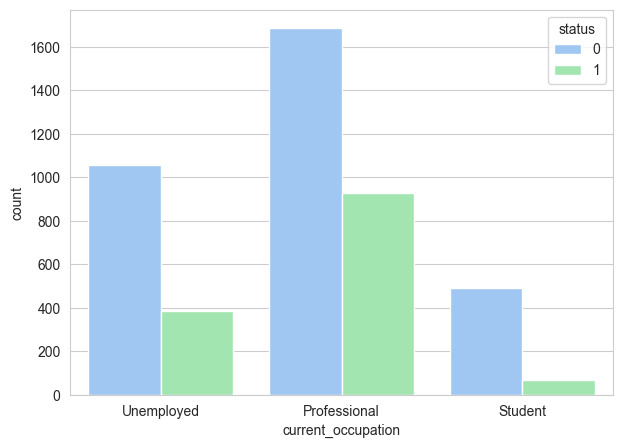

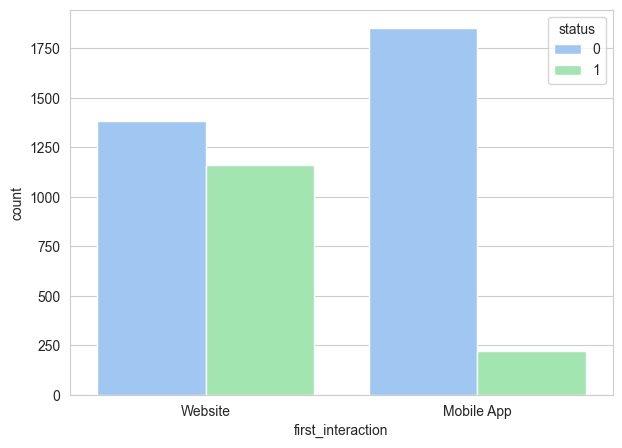

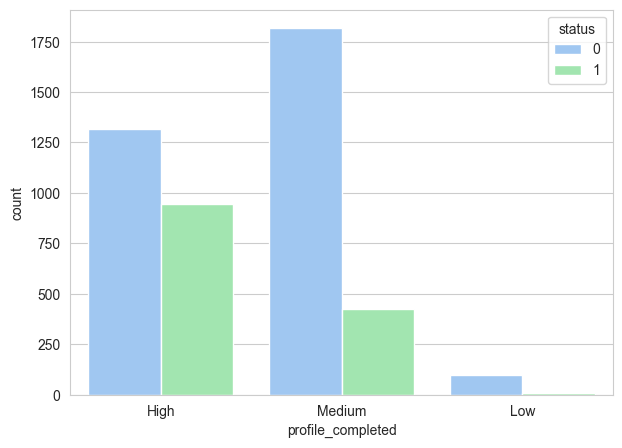

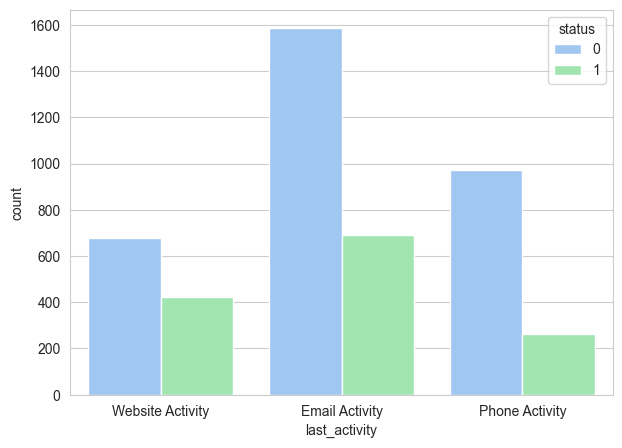

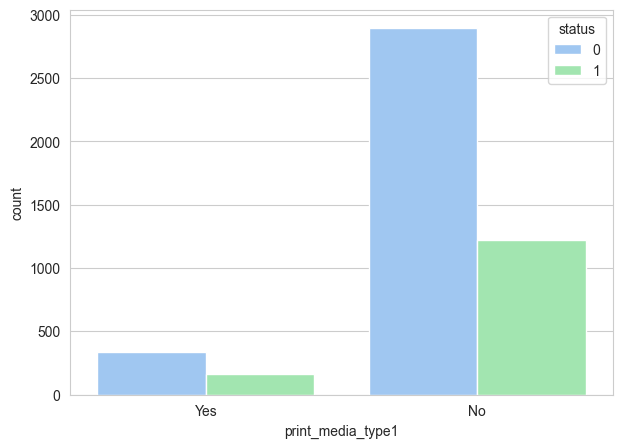

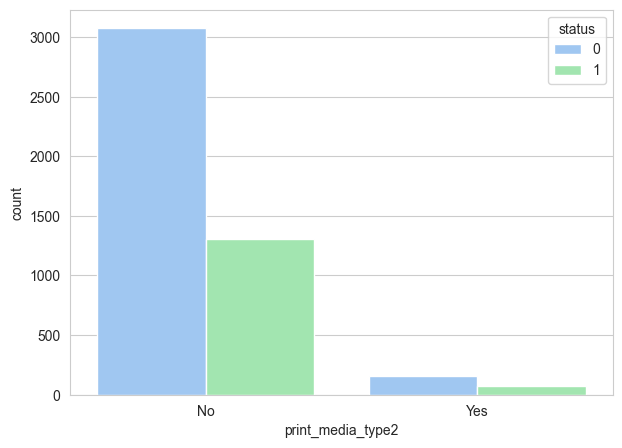

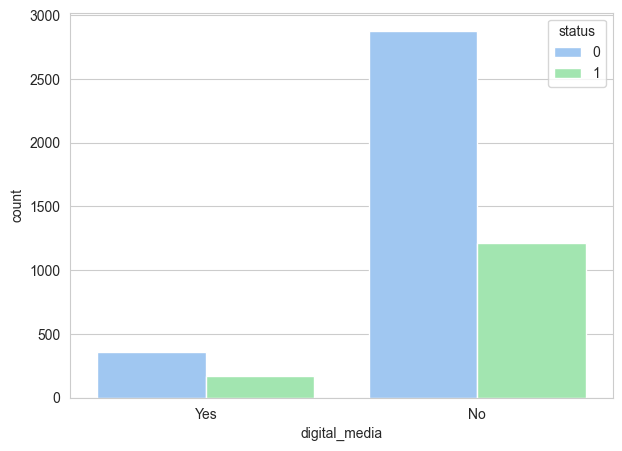

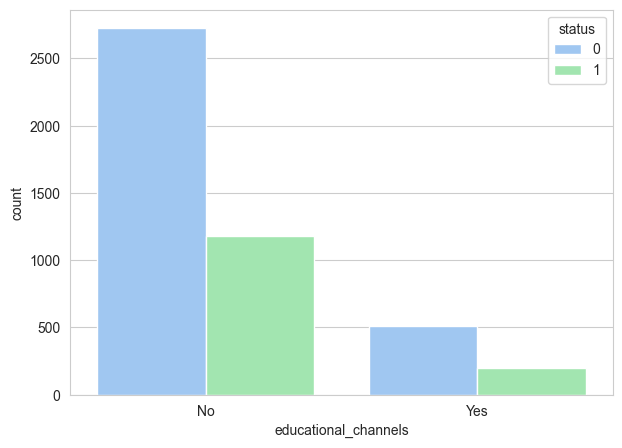

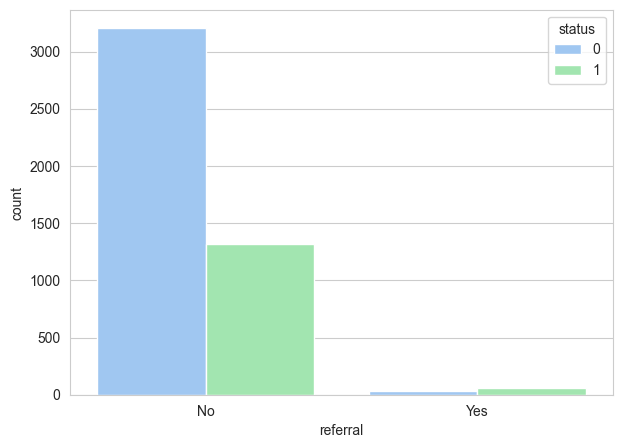

In [20]:
# iterating through the categorical columns and building a countplot to visualize the categorical columns to observe the frequency of each feature 
for i in cat_cols.columns: 
  bar_countplot(data=data, feature=i)

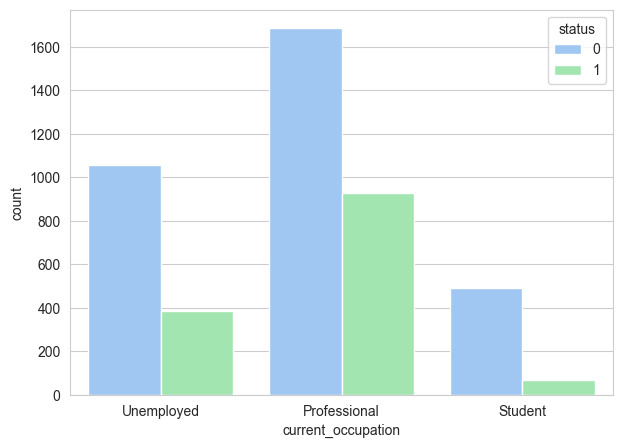

In [21]:
plt.figure(figsize = (7, 5))
sns.countplot( x = 'current_occupation' ,hue = 'status', data = data  )
plt.show()

#### Observations: 
1. Current Occupation:
Professionals are the most engaged group and have a higher conversion rate compared to the other categories.
Students have a moderate engagement and conversion rate.
Unemployed leads have the least engagement and conversion rate.
2. First Interaction:
Most of the leads interact first through the website, and the conversion rate for these leads is higher compared to those interacting through the mobile app.
3. Profile Completion:
Leads with a high profile completion rate have a higher count and conversion rate.
Medium profile completion has a significant count but a lower conversion rate than the high completion category.
Low profile completion has the least count and conversion rate, indicating that leads who invest time in completing their profiles are more likely to convert.
4. Last Activity:
Website activity leads have the highest engagement but not the highest conversion rate.
Email activity has a lower count of leads but a relatively higher conversion rate than website activity.
Phone activity has the lowest engagement among the three but has a conversion rate close to that of email activity, suggesting that personal touchpoints like phone calls may be effective in conversion.
5. Advertising Media Exposure:
A vast majority of leads have not seen print media type1 (newspaper) ads but have a higher conversion rate than those who have.
For print media type2 (magazine), a large number of leads have not seen these ads, and the conversion rate for these leads is also higher.
Digital media shows a similar pattern to print media type1, with most leads not having seen digital ads but having a higher conversion rate.
Educational channels follow the same trend, with most leads not engaged through these channels but showing a higher conversion rate.
6. Referral:
The majority of leads were not referred by someone, yet they have a higher conversion rate compared to those who were referred.
#### General Observations:
* The data indicates that leads with higher engagement levels, such as high profile completion and those who interact through phone and email, are more likely to convert.
* Surprisingly, leads who have not been exposed to advertising or educational channels have a higher conversion rate, which might suggest that these marketing channels are not as effective in acquiring paying customers as other methods.
* The referral system seems to be underperforming in terms of converting leads to paid customers.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [22]:
#Isolatating target var
x = data.drop(columns = 'status')
y = data['status']

In [23]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
x = pd.get_dummies(x, drop_first = True)
x

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.320,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.074,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.057,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.914,True,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,False,True,False,False,True,True,False,False,False,False,True,False
4608,55,8,2327,5.393,False,False,False,False,True,False,False,False,False,False,False,False
4609,58,2,212,2.692,False,False,True,False,False,False,False,False,False,False,False,False
4610,57,1,154,3.879,False,False,False,False,True,False,True,True,False,False,False,False


In [24]:
#Splitting the data into training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state =1)

In [25]:
x_test.dtypes.value_counts()

bool       12
int64       3
float64     1
Name: count, dtype: int64

In [26]:
print("Shape of X:", x_train.shape) 
print("Shape of y:", y_train.shape) 

Shape of X: (3228, 16)
Shape of y: (3228,)


In [27]:
print('Shape of training set: ', x_train.shape)   

print('Shape of test set: ', x_test.shape)

print('Target classes distribution in training set:')

print(y_train.value_counts(normalize = True))

print('Target classes distribution in test set:')

print(y_test.value_counts(normalize = True))

Shape of training set:  (3228, 16)
Shape of test set:  (1384, 16)
Target classes distribution in training set:
status
0    0.704151
1    0.295849
Name: proportion, dtype: float64
Target classes distribution in test set:
status
0    0.695087
1    0.304913
Name: proportion, dtype: float64


## ML Model Pipeline

In [28]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear', random_state = 42))
model_pipeline.append (SVC(probability=True, random_state = 42))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append (DecisionTreeClassifier(random_state = 42))
model_pipeline.append (RandomForestClassifier(random_state = 42))
model_pipeline.append (GaussianNB())

In [29]:
model_pipeline

[LogisticRegression(random_state=42, solver='liblinear'),
 SVC(probability=True, random_state=42),
 KNeighborsClassifier(),
 DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GaussianNB()]

## Model Performance evaluation and improvement

In [30]:
# List to hold the names of the models
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

# Lists to store the evaluation metrics
acc_list = []
cm_list = []
auc_list = []

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       962
           1       0.72      0.62      0.67       422

    accuracy                           0.81      1384
   macro avg       0.78      0.76      0.77      1384
weighted avg       0.81      0.81      0.81      1384


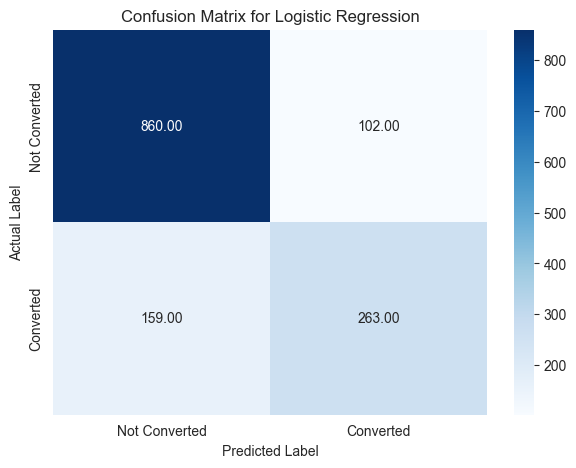

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       962
           1       0.45      0.20      0.28       422

    accuracy                           0.68      1384
   macro avg       0.59      0.55      0.54      1384
weighted avg       0.64      0.68      0.64      1384


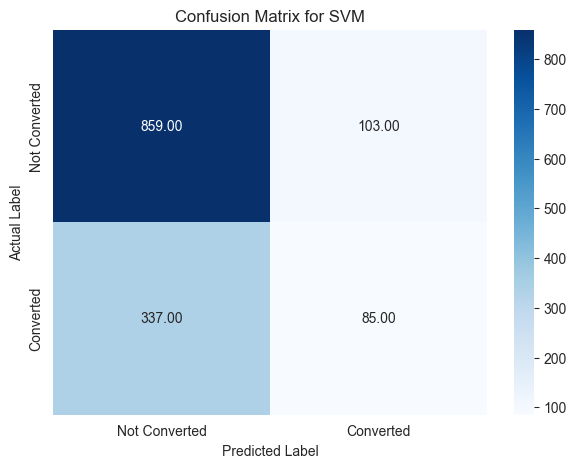

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       962
           1       0.52      0.41      0.46       422

    accuracy                           0.71      1384
   macro avg       0.64      0.62      0.63      1384
weighted avg       0.69      0.71      0.70      1384


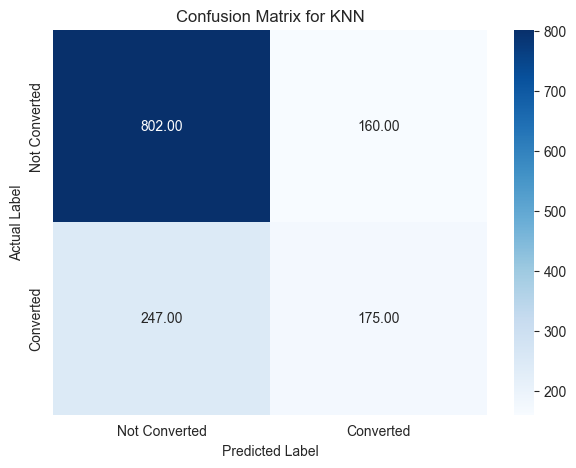

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384


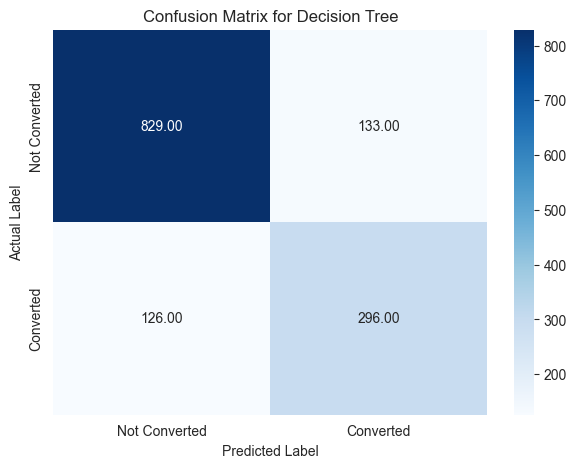

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       962
           1       0.80      0.69      0.74       422

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384


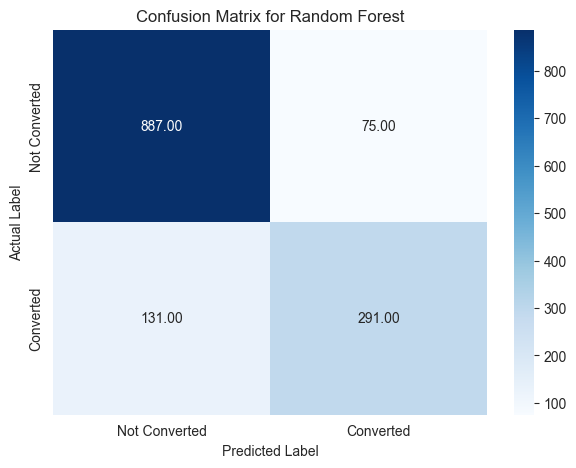

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       962
           1       0.63      0.68      0.66       422

    accuracy                           0.78      1384
   macro avg       0.75      0.75      0.75      1384
weighted avg       0.79      0.78      0.79      1384


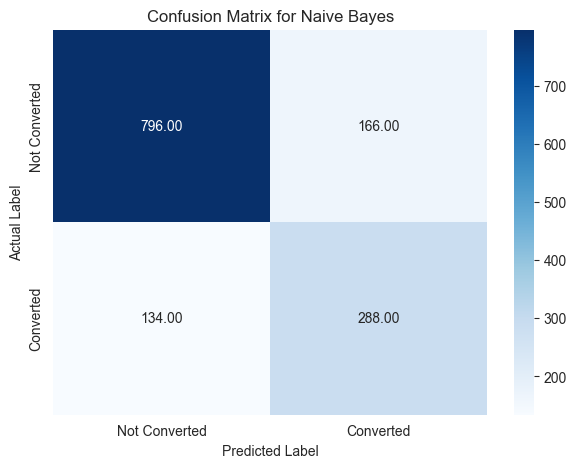

In [31]:
# Evaluate each model
for i, model in enumerate(model_pipeline):
    # Fit model on training data
    model.fit(x_train, y_train)
    
    # Predict on testing data
    y_pred = model.predict(x_test)
    
    # Calculate and store the accuracy
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    
    # Calculate and store the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_list.append(cm)
    
    # Print classification report for each model
    print(f"Classification Report for {model_list[i]}:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix for each model
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.title(f'Confusion Matrix for {model_list[i]}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()


Confusion matrix indicates the actual values vs. predicted values and summarize the true negative, false positive, false negative and true positive values in a matrix format.

Reading confusion matrix (clockwise):

True Positive:  Predicting the lead will not convert the booking and the lead does not convert.
False Positive:  Predicting the lead will not convert and the lead is converted.
True Negative:  Predicting the lead will convert to a paid customer and the lead does convert.
False Negative:  Predicting the lead will convert to a paid customer but the lead does not converted.

In order to minimize false negatives, we want to maximize recall. 

Additionally, we need to understand the evaluation metrics 

* Precision tells us out of all the instances the model predicted as positive, how many were actually positive.
* Recall tells us out of all the actual positive instances, how many the model predicted correctly.
* The F1 score is the harmonic mean of precision and recall, providing a balance between the two when we have an uneven class distribution : F1=2×((Precision+Recall) / (Precision×Recall))
* Support refers to the actual number of occurrences of the class in the specified dataset. For the confusion matrix, support for the 'Converted' class would be the sum of the 'Converted' row (TP + FN), and for the 'Not Converted' class, it would be the sum of the 'Not Converted' row (TN + FP).



#### Observations: 
* Random Forest: Exhibits the highest accuracy and F1 scores, indicating a robust performance across both classes with a strong balance between precision and recall.

* Decision Tree: Shows commendable recall for the 'Converted' class but with lower overall accuracy and F1 scores compared to Random Forest, suggesting some overfitting may be present.

* Logistic Regression: Provides moderate precision with lower recall for the 'Converted' class, indicating a more conservative prediction but potentially missing out on true positives.

In [32]:
## accuracy and AUC
result_df = pd.DataFrame({'Model' :model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.811416,0.76
1,SVM,0.682081,0.55
2,KNN,0.705925,0.62
3,Decision Tree,0.812861,0.78
4,Random Forest,0.851156,0.81
5,Naive Bayes,0.783237,0.75


Based on three evaluations methods above, random forests and Decision Tree have the best performance, whereas SVM & KNN is not doing well.

### **Random Forest - Hyperparameter Tuning**

In [33]:
# Define the parameter grid
param_grid = {
    # 'n_estimators' represents the number of trees in the forest. More trees can increase accuracy but also computational cost.
    'n_estimators': [100, 200, 300, 400, 500],
    
    # 'max_depth' is the maximum number of levels in each decision tree. Deeper trees can model more complex patterns but may lead to overfitting.
    'max_depth': [None, 10, 20, 30, 40],
    
    # 'min_samples_split' is the minimum number of data points placed in a node before the node is split.
    # A higher value can lead to less overfitting but may not capture sufficient complexity in the data.
    'min_samples_split': [2, 5, 10],
    
    # 'min_samples_leaf' is the minimum number of data points allowed in a leaf node. 
    # This can smooth the model, especially for regression.
    'min_samples_leaf': [1, 2, 4],
    
    # 'max_features' determines how many features each tree is randomly assigned. 
    # 'auto' uses all features, 'sqrt' uses a random subset of sqrt(n_features), 
    # and 'log2' is another way of reducing feature space to log2(n_features).
    'max_features': ['auto', 'sqrt', 'log2']
}

In [34]:
# Initialize the classifier
rf_tuned = RandomForestClassifier(random_state=42)

In [35]:
# Initialize RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

rf_random_search = RandomizedSearchCV(estimator=rf_tuned, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [36]:
# Fit the random search model
rf_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

comment: RandomizedSearchCV can reduce computation time by searching over a random sample of parameters and a fixed number of iterations

In [37]:
# Print the best parameters and the best score
print(f"Best Parameters: {rf_random_search.best_params_}")
print(f"Best Score: {rf_random_search.best_score_}")

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Best Score: 0.8701994384044927


              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384


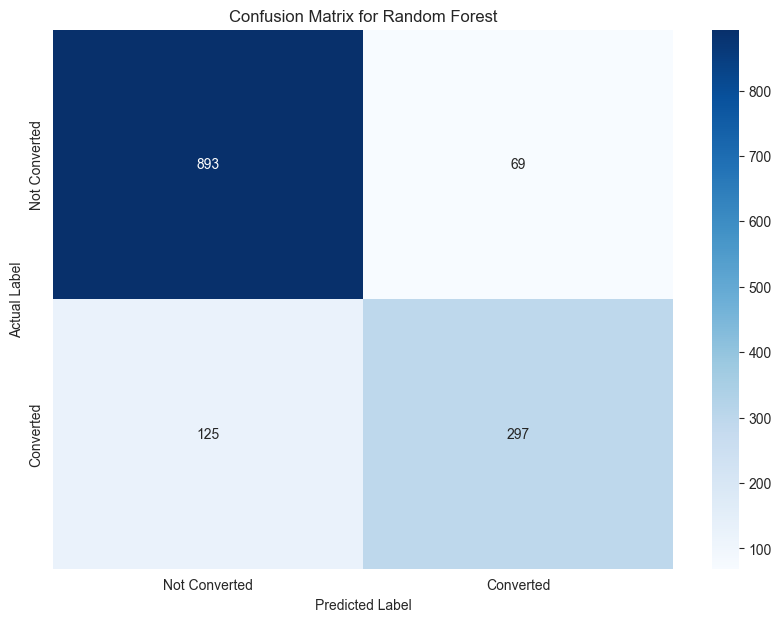

In [38]:
best_estimator = rf_random_search.best_estimator_
y_pred = best_estimator.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred)) 

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

The optimized Random Forest model achieves an overall accuracy of 86%, indicating strong predictive performance. With a precision of 81% for the positive class (Converted), the model is reliable in its predictions of conversion, showing that when it predicts a lead will convert, it is correct most of the time. The model also shows a recall of 70% for the positive class, which reflects its ability to capture a substantial proportion of the actual conversions. 

# Visualizing a Single Decision Tree from the Random Forest

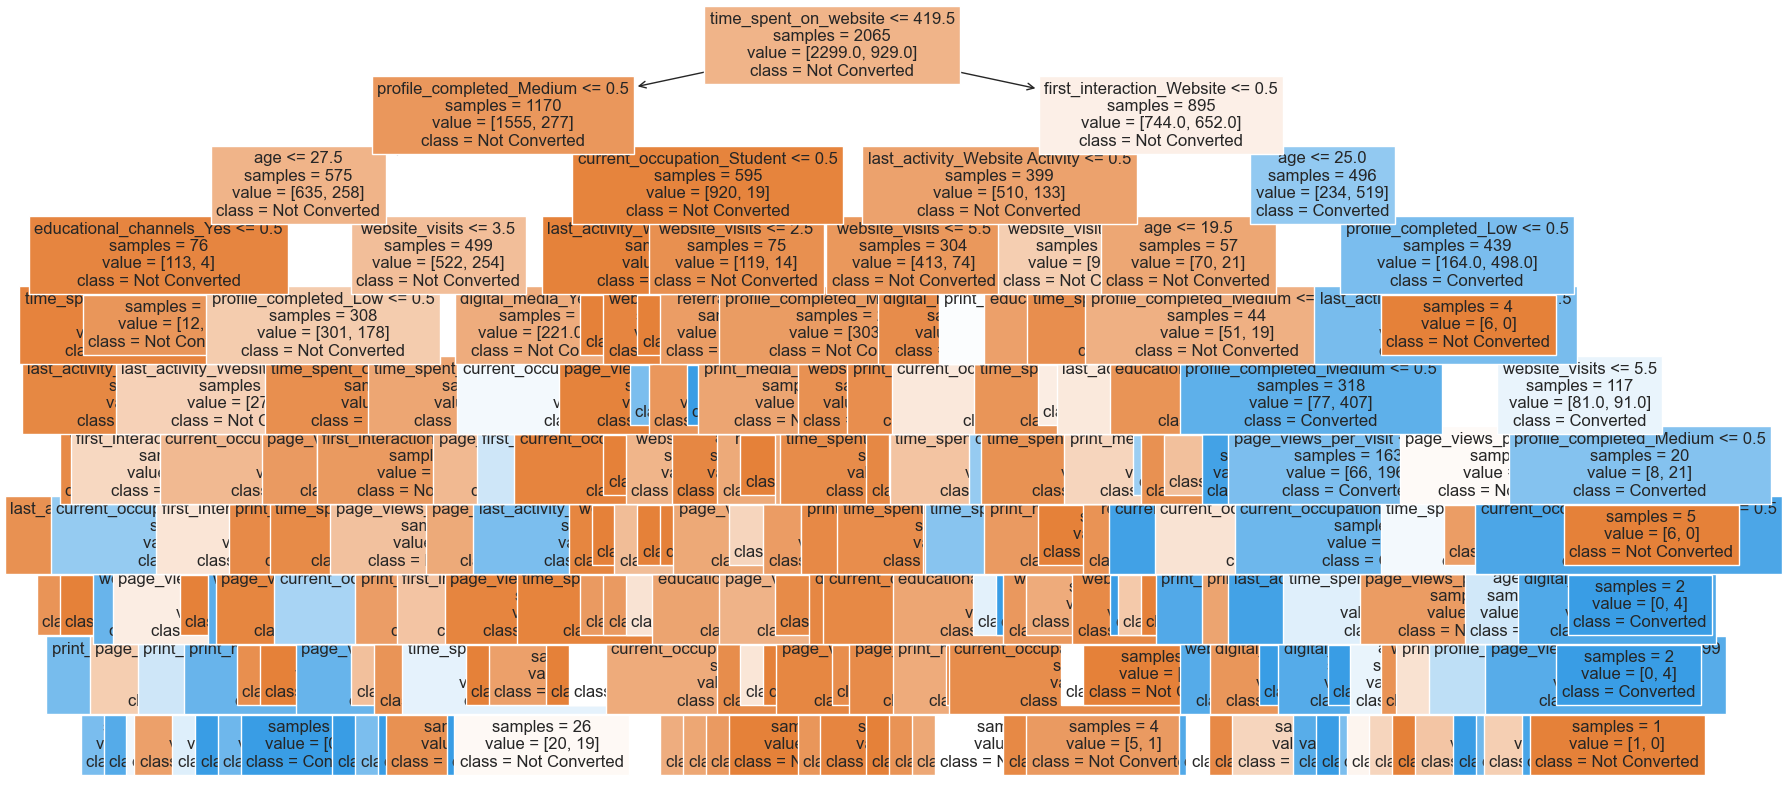

In [39]:
from sklearn.tree import plot_tree

# Select one of the trees from your random forest to visualize
single_tree = best_estimator.estimators_[5]  # You can choose any index from 0 to n_estimators-1

# Set the size of the figure
plt.figure(figsize=(20,10))

# Plot the decision tree
plot_tree(single_tree, 
          feature_names=x_train.columns,  
          class_names=['Not Converted', 'Converted'],  
          filled=True, impurity=False, fontsize=12)

# Show the plot
plt.show()

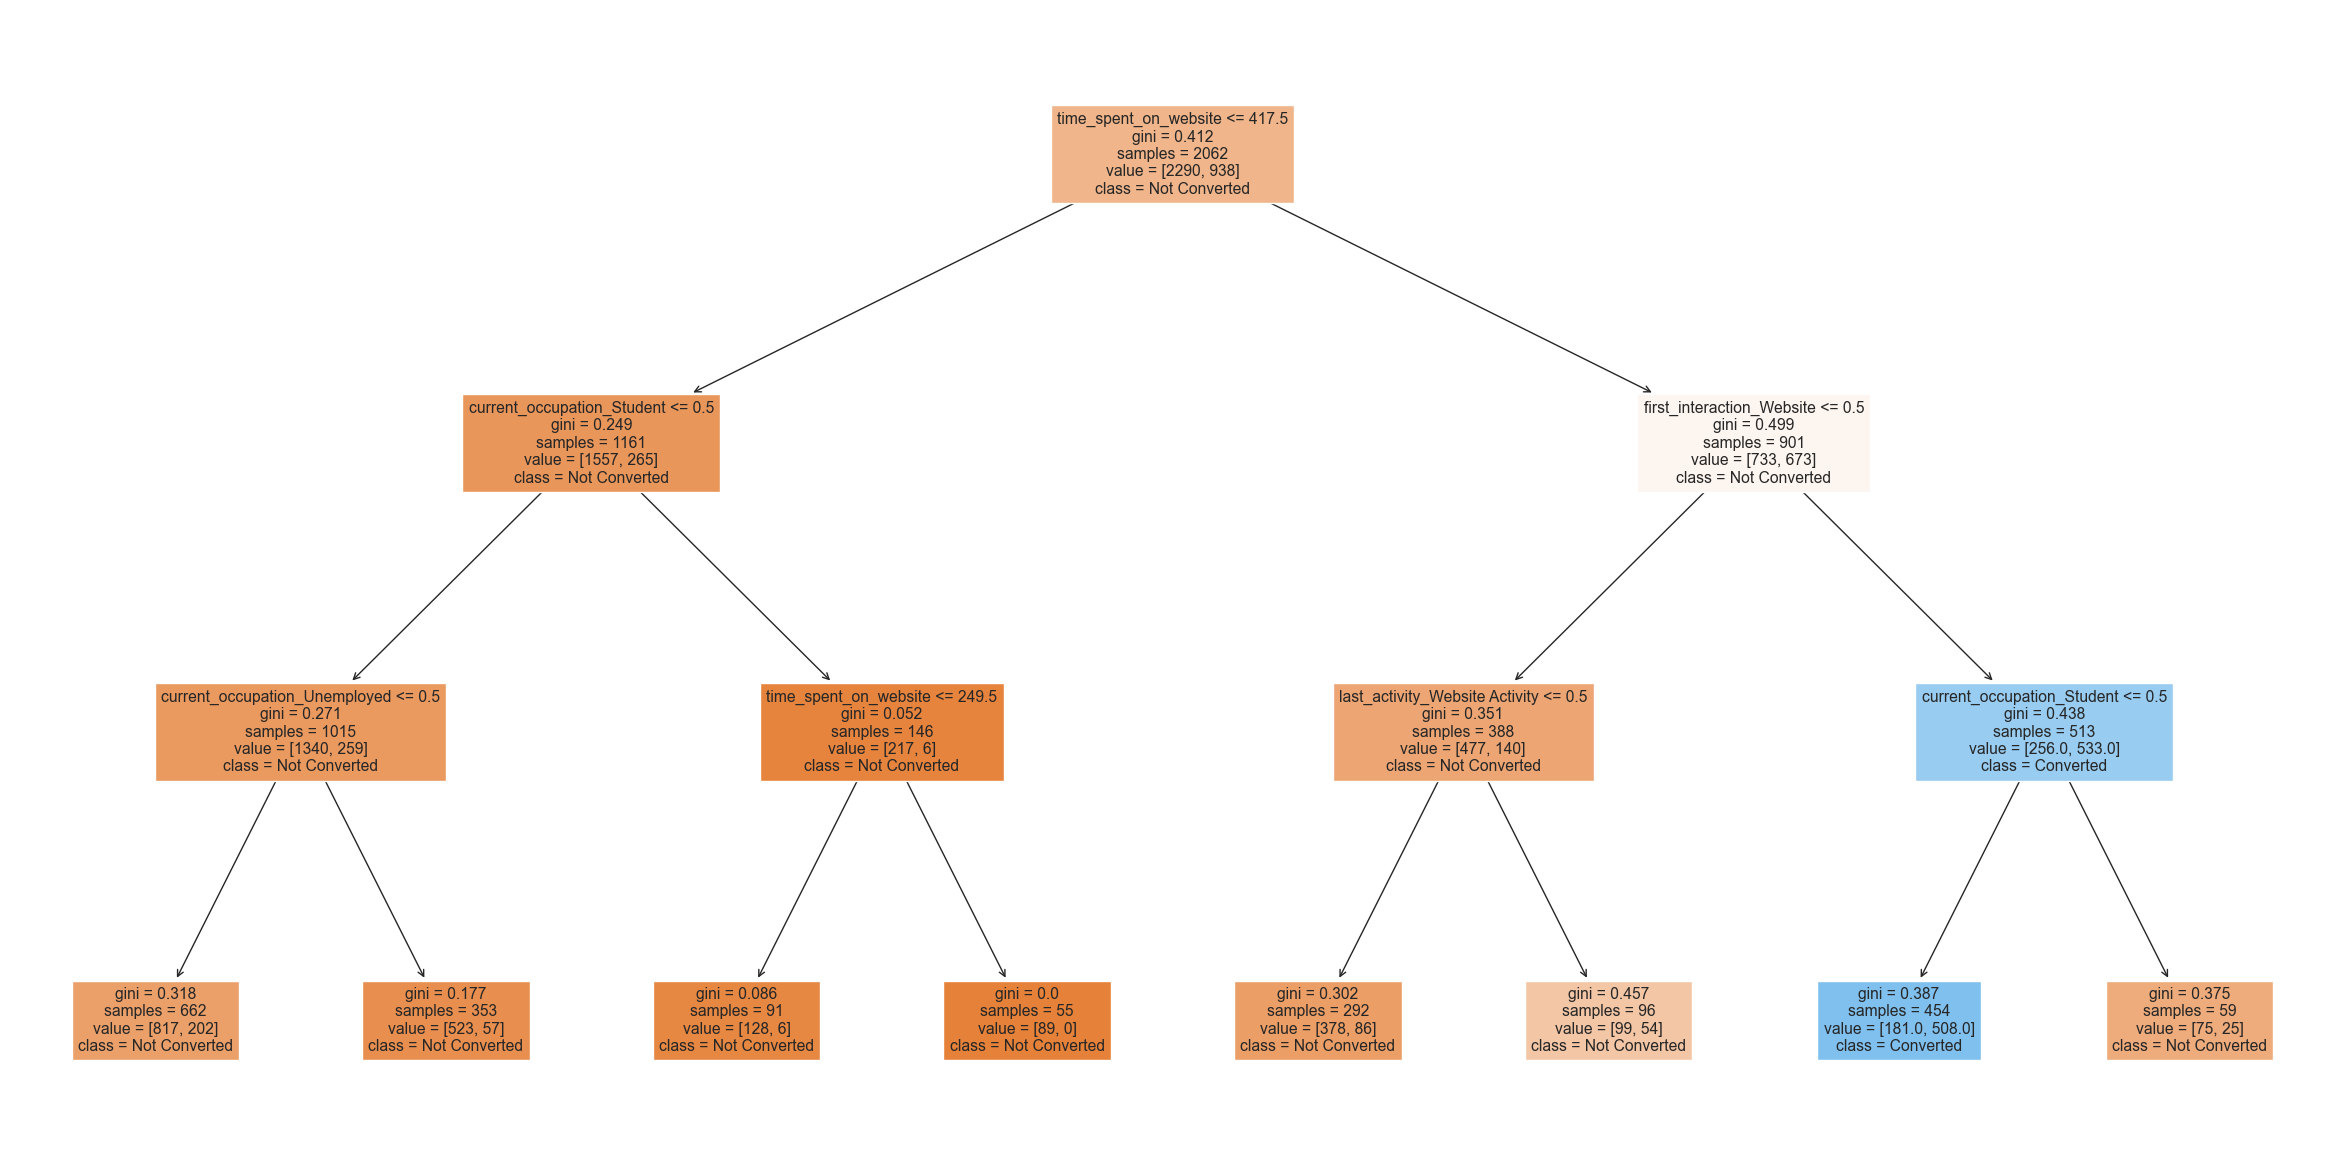

In [40]:
# For readability purposes i will train a new Random Forest with a limited max_depth
rf_shallow = RandomForestClassifier(max_depth=3, random_state=42)
rf_shallow.fit(x_train, y_train)

# Visualize one of its shallow trees
shallow_tree = rf_shallow.estimators_[0]
plt.figure(figsize=(30, 15))  # Increase figure size
plot_tree(shallow_tree, feature_names=x_train.columns, class_names=['Not Converted', 'Converted'], filled=True)
plt.show()

#### Explanation: 
The decision tree visualization depicts a binary tree structure that represents a series of decision rules based on the features of the dataset. Here's a short observation:

The root node starts with the feature time_spent_on_website at a threshold of 417.5, indicating that this feature is the most significant in separating the 'Converted' and 'Not Converted' classes at the first decision level. The left branch of the root node, which corresponds to less time spent on the website, leads to a majority of 'Not Converted' classifications. In contrast, the right branch, indicating more time spent on the website, suggests a higher chance of conversion, but still contains a mix of both classes.

As we move down the left side, current_occupation_Student appears as a strong feature, further splitting the data into 'Not Converted' when the feature's value is below 0.5.

On the right side, the feature first_interaction_Website is used, leading to nodes that focus on last_activity_Website Activity and current_occupation_Student, with the latter feature's node leading to a 'Converted' classification when its value is below 0.5.

Overall, the tree suggests that 'time spent on the website' and 'current occupation being a student' are important features for predicting conversion, with different paths in the tree capturing different profiles of individuals who are more or less likely to convert. The leaves of the tree provide the final classification based on the culmination of decisions taken at each node, with varying sample sizes and class distributions indicating the prevalence of each outcome.

# Feature Importance:

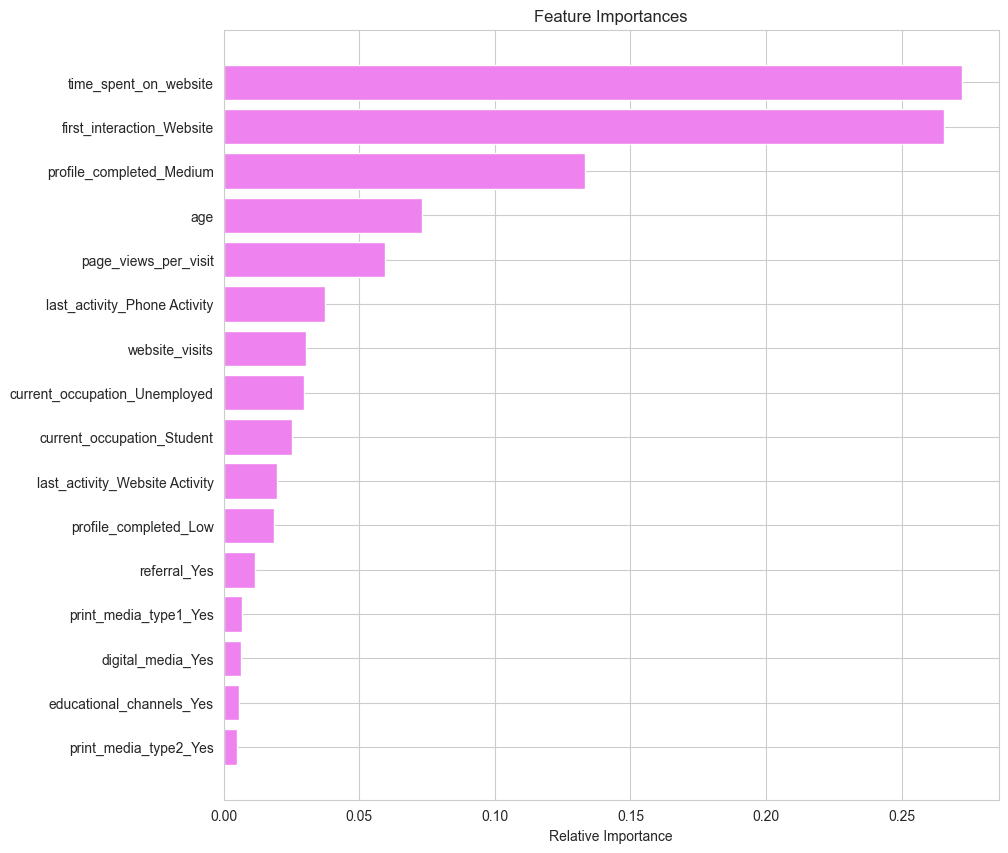

In [41]:
# Assuming best_estimator is the best estimator from RandomizedSearchCV
feature_importances = best_estimator.feature_importances_
# Assuming X_train is your training dataset, and it is a DataFrame
features = x_train.columns
indices = np.argsort(feature_importances)

# Tailor the following line if you have a lot of features; it controls how many to plot
num_features = len(features) if len(features) < 20 else 20 

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(num_features), feature_importances[indices][-num_features:], color='violet', align='center')
plt.yticks(range(num_features), [features[i] for i in indices][-num_features:])
plt.xlabel('Relative Importance')
plt.show()

#### Observations: 
1. The most important feature for the model is time_spent_on_website, which has the highest relative importance by a significant margin. This suggests that the duration a user spends on the website is the strongest predictor of the target variable in the dataset. 
2. The second most important feature is first_interaction_Website, indicating that the initial interaction type also plays a crucial role in predictions.
3. Other notable features include profile_completed_Medium and age, which have moderate importance.
4. Features related to current_occupation (both Unemployed and Student) also contribute to the model, although to a lesser extent compared to time_spent_on_website. The least important features are related to print_media_type2, educational_channels, and digital_media, which might suggest these factors are less decisive in the model's predictions.

## Actionable Insights and Recommendations

Overall, the model appears to rely heavily on how users interact with the website (time spent and first interaction) and certain profile characteristics (completion status and age), which could provide actionable insights for strategies focused on user engagement and targeted marketing.

With the refined Random Forest model demonstrates commendable precision at 81%, a recall of approximately 70.38%, and an overall accuracy of 86%. These metrics illustrate the model's proficiency in accurately identifying leads with a high likelihood of conversion, while maintaining a strong balance between sensitivity and specificity.

#### Through feature importance analysis, we've identified that:

* Time spent on the website: This is the most influential predictor, suggesting that enhancing user engagement through content and site functionality could significantly boost conversion rates.

* First interaction through the website: A crucial factor for predicting conversions, indicating that initial digital touchpoints should be optimized for lead capture and conversion.

* Profile completeness: A moderately complete profile correlates with higher chances of conversion, emphasizing the value of encouraging users to fill out their profiles.

#### Secondary factors affecting conversion probabilities include:

1. Occupation: Non-student and late-career individuals show a higher propensity to convert. Tailored marketing approaches for these demographics could yield better conversion outcomes.

2. Age: This suggests that targeting strategies may need to be adjusted according to the age spectrum to better align with conversion trends.

Moreover, the model's precision indicates that when it predicts a lead will convert, it is correct 81% of the time. This is particularly useful for efficiently allocating resources to those leads most likely to yield results.

However, our EDA indicates potential areas for strategic improvement:

--> The data suggests that current advertising channels may not be as effective, prompting a need to reassess their deployment and perhaps to diversify our advertising strategies.

--> Lower conversion rates from mobile application interactions suggest room for enhancing the mobile user experience.

--> While not as impactful as other factors, referrals still play a role in conversions, warranting further optimization of these programs.

In summary, the model suggests prioritizing website engagement and optimizing digital touchpoints to improve conversion rates. Additionally, it is advisable to reassess advertising channels and enhance the mobile experience to ensure a holistic approach to lead conversion. Refining strategies based on occupation and age can further improve the targeting of potential converters



#### Business Recommendations: 

we can do the following to ensure more paid leads: 
1. Since time_spent_on_website is the most significant predictor, focus on strategies to increase user engagement and time spent on the site. This could include improving website content, user interface design, and offering interactive elements that encourage longer visits.
2. The first_interaction_Website feature is also crucial. Analyze the pathways that lead to the first interaction and optimize marketing campaigns to attract users in ways that are more likely to convert.
3. Encourage users to complete their profiles to at least a medium level (profile_completed_Medium). This could be achieved by incentivizing profile completion with rewards or highlighting the benefits of a complete profile to the user experience.
4. Since age is an important feature, consider tailoring content and marketing efforts to the age demographics that are most likely to convert based on your model's findings.
5. Customized user experiences based on occupation (current_occupation_Unemployed and current_occupation_Student) could lead to higher conversion rates. For students and unemployed visitors, consider offering special deals or content that resonates with their specific situations.
6. Given that last_activity_Phone Activity has some significance, ensure that the website is optimized for mobile use and consider campaigns that engage users through mobile-specific channels.
7. he lower importance of referral_Yes might imply that the current referral program is not a strong driver for conversion. Enhance the referral program with better incentives or streamline the referral process to make it more effective
8. These features have moderate importance, which suggests that repeat visits and multiple page views could lead to higher conversion rates. Develop retargeting strategies and content recommendations to encourage return visits and more page views per visit